## Assignment 8
### PJ Grant
### Dec 13th, 2024

### The libraries you will use are already loaded for you below

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

## Question 1
Read in the two Netflix CSV files from /Data/Netflix as pandas dataframes. Print the number of unique genres. This is not as simple as it sounds. You cannot simply find the length of `titles['genres'].unique()`. You must convert the output of that code to a list, iterate over that list and replace the following characters: `[]',`. Once you have them replace you can split the individual strings to list items and flatten the list. I have already imported the `chain()` function for you to flatten the list. Look up the documentation to see its usage. There are 19 unique genres, but I want you to write the code to find them. 

In [2]:
credits = pd.read_csv('Data/Netflix/credits.csv')
titles = pd.read_csv('Data/Netflix/titles.csv')

I know this isn't the right way to do this, plan to stay after lecture and ask

In [3]:
total_genres = []
final_list = []
for genre in titles['genres']:  
    cleaned_genre = genre.replace('[',"").replace(']',"").replace("'","").split(',')
    total_genres.append(cleaned_genre)
    
updated_list = list(itertools.chain(*total_genres))

for item in updated_list:
    result = item.strip()
    if result !='':
        final_list.append(result)
final_list = set(final_list)

print(final_list)

{'action', 'history', 'war', 'sport', 'scifi', 'animation', 'fantasy', 'music', 'thriller', 'comedy', 'documentation', 'western', 'european', 'reality', 'horror', 'crime', 'family', 'drama', 'romance'}


## Question 2
Print the release year and the imdb score of the highest average score of all movies by year. This is trickier than it sounds. To do this you will need to aggregate the means by year. If you use the simple method you will get a pandas series. The series will need to be converted to a dataframe and the index will need to be set as a column (release year). Once you have done that you can find the numerical index with the highest average imdb score. 

In [4]:
high_score = titles.groupby('release_year')['imdb_score'].mean().sort_values(ascending = False).to_frame()
high_score = high_score.reset_index()

print(f'The year with the highest average IMDB score is {high_score['release_year'][0]}, with a score of {high_score['imdb_score'][0]}')

The year with the highest average IMDB score is 1985, with a score of 8.0


In [5]:
high_score

,release_year,imdb_score
0,1985,8.000000
1,1969,7.850000
2,1964,7.800000
3,1967,7.700000
4,1963,7.600000
...,...,...
62,1988,5.971429
63,1992,5.833333
64,1980,5.650000
65,1978,4.200000


## Question 3
There were 208 actors in the movie with the most credited actors. What is the title of that movie? Nulls and NaN values do not count. 

In [6]:
#Group the credits data frame by movie ID and find the count of each actor
most_actors = credits.groupby('id')['name'].count().sort_values(ascending = False).to_frame()

#Reset the index and rename the columns
most_actors = most_actors.reset_index().rename(columns = {'name': 'actor_count'})

# Find the movie id with 208 actors
movie_id = most_actors[most_actors['actor_count'] == 208]
movie_id = movie_id['id'][0]
movie_id

# Filter the titles data frame for the desired movie id
answer_title = titles[titles['id'] == movie_id].iloc[0]

print(f'The movie with 208 accredited actors is {answer_title['title']}')

The movie with 208 accredited actors is Les Misérables


## Question 4
Which movie has the highest IMDB score for the actor Robert De Niro? What year was it made? Create a kdeplot (kernel density estimation to show the distribution of his IMDB movie scores. 

In [7]:
# Find the highest rating for Robert De Niro
movie_id = credits[credits['name'] == 'Robert De Niro']['id']
robert_d_movies = titles[titles['id'].isin(movie_id)]
highest_rating = robert_d_movies.sort_values('imdb_score', ascending = False).iloc[0]
title = highest_rating['title']
rating = highest_rating['imdb_score']

print(f'The highest IMDB score for Robert De Niro was {rating} for the movie {title}')

The highest IMDB score for Robert De Niro was 8.3 for the movie Taxi Driver


Text(0, 0.5, 'Density')

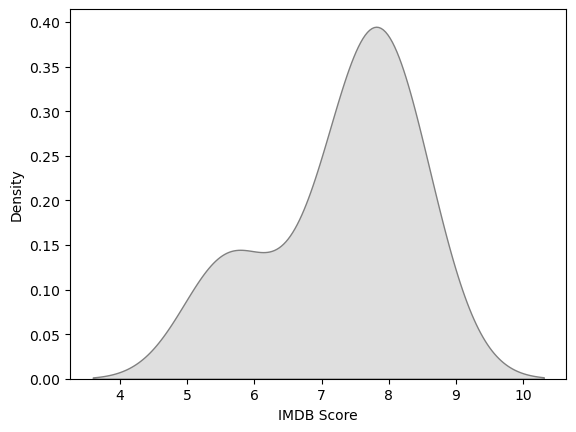

In [8]:
#Create the KDE Plot
sns.kdeplot(robert_d_movies['imdb_score'], fill = True, color = 'grey')
plt.xlabel('IMDB Score')
plt.ylabel('Density')

## Question 5
Create two new boolean columns in the titles dataframe that are true when the description contains war or gangster. Call these columns `war_movies` and `gangster_movies`. How many movies are there in both categories? Which category has a higher average IMDB score? Show the IMDB score kernel density estimations of both categories.


In [9]:
#Create the two new columns
titles['war_movies'] = np.where(titles['description'].str.contains('war', case=False, na=False), True, False)
titles['gangster_movies'] = np.where(titles['description'].str.contains('gangster', case=False, na=False), True, False)

# Find the counts
war_count = titles['war_movies'].sum()
gangster_count = titles['gangster_movies'].sum()

print(f'There are {war_count} war movies and {gangster_count} gangster movies')

There are 437 war movies and 35 gangster movies


In [10]:
#Find the highest average
war_avg = titles[titles['war_movies'] == 1]['imdb_score'].mean()
gangster_avg = titles[titles['gangster_movies'] == 1]['imdb_score'].mean()

if war_avg > gangster_avg:
    print('War movies have the higher average')
elif gangster_avg > war_avg:
    print('Gangster movies have the higher average')

War movies have the higher average


Text(0.5, 1.0, 'IMDB Scores for War Related Movies')

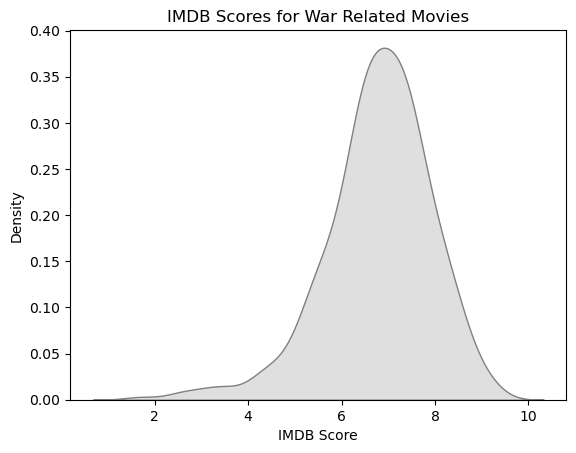

In [11]:
# War Movie Plot
war_movies = titles[titles['war_movies'] == True]
war_movies
sns.kdeplot(war_movies['imdb_score'], fill = True, color = 'grey')
plt.xlabel('IMDB Score')
plt.ylabel('Density')
plt.title('IMDB Scores for War Related Movies')

Text(0.5, 1.0, 'IMDB Scores for Gangster Related Movies')

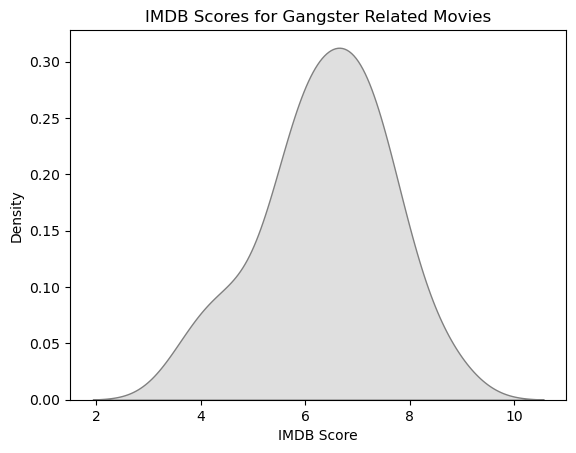

In [12]:
# Ganster Movie Plot
gangster_movies = titles[titles['gangster_movies'] == True]
sns.kdeplot(gangster_movies['imdb_score'], fill = True, color = 'grey')
plt.xlabel('IMDB Score')
plt.ylabel('Density')
plt.title('IMDB Scores for Gangster Related Movies')